In [1]:
#  Required Install
!pip install librosa

In [8]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display
import glob

# Sample one audio File

[-5.2936412e-07  5.2245684e-07 -4.8367059e-07 ... -7.7196285e-07
  7.8327724e-07  0.0000000e+00] 22050


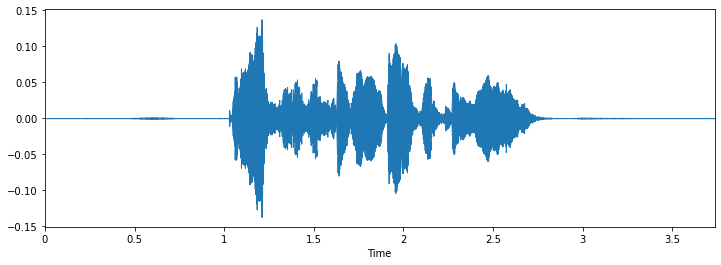

In [108]:
data, sampling_rate = librosa.load('../data/emotion_speech/03-01-06-01-02-02-02.wav')
plt.figure(figsize=(12, 4))

print(data, sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)

# Generate list of file and apply emotion str

In [176]:
##Get list of Files in folder
file_name = []

for root, dirs, files in os.walk("../data/emotion_speech/."):
    for filename in files:
        file_name.append(filename)

file_name_df = pd.DataFrame(file_name, columns = ['file_name'])
file_name_df['encoding']= file_name_df['file_name']
file_name_df['ID'] = file_name_df.index 
file_name_df

,file_name,encoding,ID
0,03-01-06-01-02-02-02.wav,03-01-06-01-02-02-02.wav,0
1,03-01-05-01-02-01-16.wav,03-01-05-01-02-01-16.wav,1
2,03-01-08-01-01-01-14.wav,03-01-08-01-01-01-14.wav,2
3,03-01-06-01-02-02-16.wav,03-01-06-01-02-02-16.wav,3
4,03-01-05-01-02-01-02.wav,03-01-05-01-02-01-02.wav,4
...,...,...,...
1436,03-01-08-02-02-01-19.wav,03-01-08-02-02-01-19.wav,1436
1437,03-01-02-02-01-01-23.wav,03-01-02-02-01-01-23.wav,1437
1438,03-01-02-01-02-01-23.wav,03-01-02-01-02-01-23.wav,1438
1439,03-01-08-01-01-01-19.wav,03-01-08-01-01-01-19.wav,1439


In [241]:
#Create DF seperating Values
# Filename identifiers

# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

encoding_df = file_name_df["encoding"].str.split("-", n=-1, expand=True)
encoding_df.columns = ['Modality','Vocal_channel','Class','Intensity','Statement','Repetition','Actor']
final_df = encoding_df.drop(columns=['Modality','Vocal_channel','Intensity','Statement','Repetition','Actor'])

final_df.loc[final_df.Class == '01', 'Emotion'] = 'nuteral'
final_df.loc[final_df.Class == '02', 'Emotion'] = 'calm'
final_df.loc[final_df.Class == '03', 'Emotion'] = 'happy'
final_df.loc[final_df.Class == '04', 'Emotion'] = 'sad'
final_df.loc[final_df.Class == '05', 'Emotion'] = 'angry'
final_df.loc[final_df.Class == '06', 'Emotion'] = 'fearful'
final_df.loc[final_df.Class == '07', 'Emotion'] = 'disgust'
final_df.loc[final_df.Class == '08', 'Emotion'] = 'surprise'

final_df

,Class,Emotion
0,06,fearful
1,05,angry
2,08,surprise
3,06,fearful
4,05,angry
...,...,...
1436,08,surprise
1437,02,calm
1438,02,calm
1439,08,surprise


In [242]:
#merge data frame and export CSV
pre_merged_df = file_name_df.join(final_df, how='outer')
merged_df = pre_merged_df.drop(columns=['encoding'])
merged_df.set_index('ID')

,file_name,Class,Emotion
ID,,,
0,03-01-06-01-02-02-02.wav,06,fearful
1,03-01-05-01-02-01-16.wav,05,angry
2,03-01-08-01-01-01-14.wav,08,surprise
3,03-01-06-01-02-02-16.wav,06,fearful
4,03-01-05-01-02-01-02.wav,05,angry
...,...,...,...
1436,03-01-08-02-02-01-19.wav,08,surprise
1437,03-01-02-02-01-01-23.wav,02,calm
1438,03-01-02-01-02-01-23.wav,02,calm


In [243]:
merged_df.to_csv(r'../data/voice_train.csv', index = True)

In [244]:
train = pd.read_csv('../data/voice_train.csv')
data_dir = ('../data')
train.head()

,Unnamed: 0,file_name,ID,Class,Emotion
0,0,03-01-06-01-02-02-02.wav,0,6.0,fearful
1,1,03-01-05-01-02-01-16.wav,1,5.0,angry
2,2,03-01-08-01-01-01-14.wav,2,8.0,surprise
3,3,03-01-06-01-02-02-16.wav,3,6.0,fearful
4,4,03-01-05-01-02-01-02.wav,4,5.0,angry


Class:  7.0


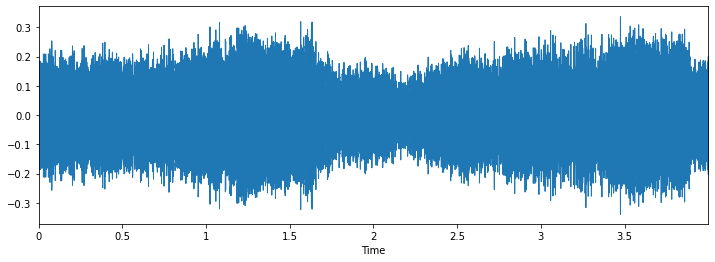

In [245]:
#examine sample of data set
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join(data_dir, 'Train', str(file_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load('../data/Train/' + str(train.ID[i]) + '.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [246]:
train.Class.value_counts()

7.0    192
4.0    192
3.0    192
2.0    192
8.0    192
5.0    192
6.0    192
1.0     96
Name: Class, dtype: int64

In [186]:
# test = pd.read_csv('../data/test.csv')
# test['Class'] = 'jackhammer'
# test.to_csv(‘sub01.csv’, index=False)

In [247]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), 'emotion_speech', str(row.file_name))

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = train.apply(parser, axis=1)

/Users/timsamson/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error encountered while parsing file:  /Users/timsamson/Desktop/Bootcamp/audible_emotion_recognition/data/emotion_speech/.DS_Store


In [248]:
# audio = pd.DataFrame(temp)
audio = pd.DataFrame(temp.tolist(), index= temp.index)
audio.columns = ['feature', 'label']
print(audio)

                                                feature  label
0     [-573.37915, 34.06404, -33.337578, 3.4899156, ...    6.0
1     [-545.24457, 38.073475, -8.023163, 7.236882, -...    5.0
2     [-690.53546, 43.141396, -9.854416, 10.81954, -...    8.0
3     [-553.61163, 41.233486, -9.912664, 8.587062, -...    6.0
4     [-576.15344, 49.947994, -13.857949, 8.248825, ...    5.0
...                                                 ...    ...
1436  [-607.41235, 73.06141, 1.1748316, 20.54036, -1...    8.0
1437  [-666.96967, 69.046394, -2.7987325, 13.330524,...    2.0
1438  [-661.24243, 58.808914, -4.742551, 11.481025, ...    2.0
1439  [-662.11896, 77.85608, 5.2998877, 22.13716, 1....    8.0
1440  [-627.04663, 65.36454, -8.032422, 10.3970175, ...    1.0

[1441 rows x 2 columns]


In [249]:
#set list as object
new_audio= audio.astype(object)
new_audio

,feature,label
0,"[-573.37915, 34.06404, -33.337578, 3.4899156, ...",6
1,"[-545.24457, 38.073475, -8.023163, 7.236882, -...",5
2,"[-690.53546, 43.141396, -9.854416, 10.81954, -...",8
3,"[-553.61163, 41.233486, -9.912664, 8.587062, -...",6
4,"[-576.15344, 49.947994, -13.857949, 8.248825, ...",5
...,...,...
1436,"[-607.41235, 73.06141, 1.1748316, 20.54036, -1...",8
1437,"[-666.96967, 69.046394, -2.7987325, 13.330524,...",2
1438,"[-661.24243, 58.808914, -4.742551, 11.481025, ...",2
1439,"[-662.11896, 77.85608, 5.2998877, 22.13716, 1....",8


In [250]:
#Write to CSV
new_audio.to_csv('../data/modeltrain.csv')

In [251]:
from sklearn.preprocessing import LabelEncoder

X = np.array(new_audio.feature.tolist())
y = np.array(new_audio.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

/Users/timsamson/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [256]:
import numpy as np
from tensorflow.keras import Sequential
# from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = tensorflow.keras.Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.core.Dense object at 0x7fb2f9a060f0>